In [20]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import mglearn 

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

/usr/local/lib/python3.5/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [26]:
sales = pd.read_csv('kc_house_data_small.csv')
X = sales['sqft_living'].values.reshape(-1,1)
y = sales['price'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)# instantiate the model and set the number of neighbors to consider to 3
reg = KNeighborsRegressor(n_neighbors=3)# fit the model using the training data and training targets
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [27]:
print(reg.score(X_test, y_test))

0.4220961650810121


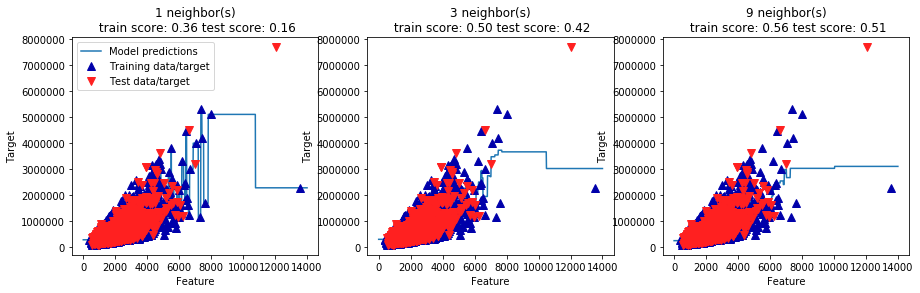

In [28]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# create 1,000 data points, evenly spaced between -3 and 3
line = np.linspace(0, 14000, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # make predictions using 1, 3, or 9 neighbors
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    ax.set_title("{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(n_neighbors,reg.score(X_train, y_train),reg.score(X_test, y_test)))
    
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend(["Model predictions", "Training data/target","Test data/target"], loc="best")

In [54]:
dtype_dict = {'bathrooms':float,     'waterfront':int,    'sqft_above':int, 
              'sqft_living15':float, 'grade':int,         'yr_renovated':int, 
              'price':float,         'bedrooms':float,    'zipcode':str, 
              'long':float,          'sqft_lot15':float,  'sqft_living':float, 
              'floors':float,        'condition':int,     'lat':float, 
              'date':str,            'sqft_basement':int, 'yr_built':int, 
              'id':str,              'sqft_lot':int,      'view':int}

sales = pd.read_csv('kc_house_data.csv', dtype=dtype_dict)

train_and_validation, test = train_test_split(sales         , test_size=0.2)
train,          validation = train_test_split(train_and_validation      , test_size=0.2)

In [55]:
def normalize_features(feature_matrix):
    
    norms = np.linalg.norm(feature_matrix, axis=0)
    normalized_features = feature_matrix / norms
    
    return(normalized_features, norms)

In [56]:
def get_numpy_data(data_sframe, features, output):
    
    data_sframe['constant'] = 1 
    features = ['constant'] + features 
    features_sframe = data_sframe[features]
    feature_matrix = features_sframe.to_numpy()
    
    output_sarray = data_sframe[output]
    output_array = output_sarray.to_numpy()
    
    return(feature_matrix, output_array)

In [73]:
feature_list = ['bedrooms',      'bathrooms', 'sqft_living',  'sqft_lot', 'floors',
                'waterfront',    'view',      'condition',    'grade',    'sqft_above',  
                'sqft_basement', 'yr_built',  'yr_renovated', 'lat',      'long',  
                'sqft_living15', 'sqft_lot15']

features_train, output_train = get_numpy_data(train, feature_list, 'price')
features_test, output_test = get_numpy_data(test, feature_list, 'price')
features_valid, output_valid = get_numpy_data(validation, feature_list, 'price')

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [74]:
features_train, norms = normalize_features(features_train)
features_test = features_test / norms
features_valid = features_valid / norms

“distance” between two given houses


In [75]:
print (features_test[0])
print (features_train[9])

[ 0.00850271  0.00732152  0.01227579  0.00609492  0.00031354  0.01608625
  0.          0.          0.00734195  0.00878951  0.00702891  0.
  0.00865731  0.          0.00852858 -0.0085124   0.00494901  0.00045206]
[ 0.00850271  0.00976202  0.01322008  0.01465773  0.00178647  0.01072417
  0.          0.          0.00734195  0.00988819  0.01690389  0.
  0.00864437  0.          0.00852409 -0.00848958  0.01590175  0.00231774]


So euclidean distance between the query house and the 10th house of the training set will be:

In [81]:
euclidean_distance = np.sqrt(np.sum((features_train[9] - features_test[0])**2))
print (euclidean_distance)

0.018255327866810795


In [97]:
dist_dict = {}
min_dist = 100

for i in range(0,10):
    dist_dict[i] = np.sqrt(np.sum((features_train[i] - features_test[0])**2))
    print ("House number:", i, " with distance of: ", dist_dict[i])
    
    if(min_dist > dist_dict[i]):
        min_dist = dist_dict[i]
        min_dist_index = i
        
print("\n\nAnd the closest house to the query house will be the: ", min_dist, "\nthe house of index:", min_dist_index)

House number: 0  with distance of:  0.010596366288813082
House number: 1  with distance of:  0.007928683422908001
House number: 2  with distance of:  0.007970231431777754
House number: 3  with distance of:  0.024420355886386306
House number: 4  with distance of:  0.04494857826084242
House number: 5  with distance of:  0.011490760494767485
House number: 6  with distance of:  0.008980901813980794
House number: 7  with distance of:  0.012784325282999727
House number: 8  with distance of:  0.021637553194600808
House number: 9  with distance of:  0.018255327866810795


And the closest house to the query house will be the:  0.007928683422908001 
the house of index: 1


In [79]:
#for i in range(3):
    #print (features_train[i]-features_test[0]) # should print 3 vectors of length 18
    
print(features_train[0:3] - features_test[0])

[[ 0.00000000e+00  0.00000000e+00 -8.49862525e-03  8.22627442e-04
   7.66191902e-04 -5.36208446e-03  0.00000000e+00  0.00000000e+00
   0.00000000e+00 -2.19737635e-03  4.74343865e-04  1.76821530e-03
  -3.40771065e-04  0.00000000e+00 -2.86402613e-05  3.96563193e-06
   1.21697064e-03  5.12448054e-04]
 [ 0.00000000e+00  2.44050569e-03 -2.83287508e-03  1.68264704e-03
   1.27642560e-03 -5.36208446e-03  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  1.94049763e-03  0.00000000e+00
  -6.90169245e-05  0.00000000e+00 -2.40456626e-05  2.46982339e-05
   3.16412365e-03  1.37371662e-03]
 [ 0.00000000e+00 -2.44050569e-03 -3.77716678e-03  8.60019599e-04
   1.85658506e-04 -5.36208446e-03  0.00000000e+00  0.00000000e+00
   2.44731505e-03  0.00000000e+00  9.91809900e-04  0.00000000e+00
  -9.05847134e-05  0.00000000e+00 -2.88190394e-05  1.15490333e-05
   2.59620402e-03  2.30210751e-04]]


In [77]:
# verify that vectorization works
results = features_train[0:3] - features_test[0]
print (results[0] - (features_train[0]-features_test[0]))
# should print all 0's if results[0] == (features_train[0]-features_test[0])
print (results[1] - (features_train[1]-features_test[0]))
# should print all 0's if results[1] == (features_train[1]-features_test[0])
print (results[2] - (features_train[2]-features_test[0]))
# should print all 0's if results[2] == (features_train[2]-features_test[0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [98]:
diff = features_train - features_test[0]

print (diff[-1].sum()) # sum of the feature differences between the query and last training house
# should print -0.0934339605842

print (np.sum(diff**2, axis=1)[15]) # take sum of squares across each row, and print the 16th sum
print (np.sum(diff[15]**2)) # print 

0.004675338436839347
0.0003831637117229123
0.00038316371172291227


In [100]:
distances = np.sqrt(np.sum(diff**2, axis=1))
print (distances[100])

0.021330439786506446


In [101]:
def compute_distances(train_matrix, query_vector):
    diff = train_matrix - query_vector
    distances = np.sqrt(np.sum(diff**2, axis=1))
    return distances

In [106]:
third_house_distance = compute_distances(features_train, features_test[2])

print ("index : ", third_house_distance.argsort()[:1])
print ("predicted value of the query house based : ", third_house_distance[third_house_distance.argsort()[:1]])

index :  [4437]
predicted value of the query house based :  [0.00471065]


In [107]:
def compute_k_nearest_neighbors(k, features_matrix, feature_vector):
    distances = compute_distances(features_matrix, feature_vector)
    return np.argsort(distances, axis = 0)[:k]

In [110]:
print ("the indices of the 4 training houses closest to the query house are :")
print (compute_k_nearest_neighbors(4, features_train, features_test[2]))

the indices of the 4 training houses closest to the query house are :
[4437 9439 9622 8986]


In [115]:
def predict_output_of_query(k, features_matrix, output_values, feature_vector):
    k_neigbors = compute_k_nearest_neighbors(k, features_matrix, feature_vector)
    avg_value = np.mean(output_values[k_neigbors])
    return avg_value

In [117]:
print("predict the value of the query house using k-nearest neighbors with k=4 and the simple averaging method :")
print (predict_output_of_query(4, features_train, output_train, features_test[2]))

predict the value of the query house using k-nearest neighbors with k=4 and the simple averaging method :
398000.0


In [131]:
def predict_output(k, features_train, output_train, features_query):
    num_of_rows = features_query.shape[0]
    predictions = []
    for i in range(num_of_rows):
        avg_value = predict_output_of_query(k, features_train, output_train, features_test[i])
        predictions.append(avg_value)
    return predictions

In [137]:
predicted_values = predict_output(10, features_train, output_train, features_test[0:10])

print ("The predicted value of this house is: ", predicted_values)
print ("\nThe index of the house in this query set that has the lowest predicted value is:",
      predicted_values.index(min(predicted_values)))

The predicted value of this house is:  [430235.0, 460450.0, 388318.5, 438460.0, 455595.0, 458295.0, 427185.0, 389050.0, 342410.0, 471515.0]

The index of the house in this query set that has the lowest predicted value is: 8


In [145]:
rss_all = []
for k in range(1,16):    
    predict_value = predict_output(k, features_train, output_train, features_valid)
    residual = (output_valid - predict_value)
    rss = sum(residual**2)
    rss_all.append(rss)

In [149]:
min_RSS_index = rss_all.index(min(rss_all)) 
print (rss_all,"\n\n", min_RSS_index,"will be the index which produced the lowest RSS on validation data")

[917336582094348.0, 855656671438796.8, 820745091149285.5, 811683497628458.5, 813289691248879.0, 803840274726501.9, 802379898605020.0, 793617321725892.5, 789718276149201.9, 785718950930536.9, 783048934984266.5, 779935186890760.1, 777510647393908.1, 775946602948152.8, 775790081253707.5] 

 14 will be the index which produced the lowest RSS on validation data


In [151]:
predict_value = predict_output(min_RSS_index, features_train, output_train, features_test)
residual = (output_test - predict_value)
rss = sum(residual**2)
print ("RSS on the TEST data using the value of",min_RSS_index,"is: ",rss)

RSS on the TEST data using the value of 14 is:  208707974774998.56
